# PERSONAS CON ACCESO A INTERNET POR PAÍS EN 2010


A través de las bases de datos disponibles en Databank del Banco Mundial (https://databank.worldbank.org/home.aspx), se recopiló información correspondiente al año 2010 para 215 países. Los datos incluyen columnas con las puntuaciones obtenidas en los Objetivos de Desarrollo Sostenible (ODS) seleccionados (11, 2, 3, 8, 9, 4 y 16) y el porcentaje de personas por cada 100 habitantes con acceso a internet en ese año. El objetivo de este proyecto es predecir, a partir de las puntuaciones en los ODS, qué proporción de la población tendría acceso a internet.


*  GOAL 11: Sustainable Cities and Communities 
*  GOAL 2: Zero Hunger 
*  GOAL 3: Good Health and Well-being 
*  GOAL 8: Decent Work and Economic Growth 
*  GOAL 9: Industry, Innovation and Infrastructure 
*  GOAL 4: Quality Education 
*  GOAL 16: Peace and Justice Strong Institutions 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
country_df = pd.read_excel('/content/drive/MyDrive/basefinal.xlsx')
country_df

,Country,GOAL11,GOAL2,GOAL3,GOAL8,GOAL9,GOAL4,GOAL16,Internet_users_per100
0,Afghanistan,0.00,0.571,0.706,0.273,0.222,0.1,0.500,4
1,Albania,0.75,0.875,0.833,0.545,0.556,0.6,0.625,45
2,Algeria,0.25,0.714,0.824,0.455,0.250,0.5,0.375,12.5
3,American Samoa,0.25,0.000,0.105,0.000,0.111,0.0,0.000,..
4,Andorra,0.00,0.000,0.500,0.083,0.000,0.2,0.500,81
...,...,...,...,...,...,...,...,...,...
211,"Yemen, Rep.",0.50,0.167,0.611,0.167,0.250,0.4,0.375,37.4
212,Zambia,1.00,0.833,0.611,0.182,0.556,0.3,0.500,12.35
213,Zimbabwe,0.00,0.667,0.667,0.273,0.222,0.3,0.250,10
214,Zambia,1.00,0.833,0.611,0.182,0.556,0.3,0.500,6.4


In [ ]:

# 1. Detectar NaNs en todo el DataFrame:
nan_count = country_df.isnull().sum().sum()
print(f"Número total de NaNs en el DataFrame: {nan_count}")

# 2. Detectar NaNs en columnas específicas:
nan_count_by_column = country_df.isnull().sum()
print("\nNúmero de NaNs por columna:")
print(nan_count_by_column)

# 3. Detectar si hay al menos un NaN en el DataFrame:
has_nan = country_df.isnull().values.any()
print(f"\n¿El DataFrame tiene al menos un NaN? {has_nan}")

Número total de NaNs en el DataFrame: 1

Número de NaNs por columna:
Country                  0
GOAL11                   0
GOAL2                    0
GOAL3                    0
GOAL8                    0
GOAL9                    0
GOAL4                    0
GOAL16                   0
Internet_users_per100    1
dtype: int64

¿El DataFrame tiene al menos un NaN? True


In [ ]:
# Eliminar filas con NaNs en la columna 'InternetUsers'
country_df.dropna(subset=['Internet_users_per100'], inplace=True)
# Crear una máscara booleana que identifique las filas con ".." en 'Internet_users_per100'
mask = country_df['Internet_users_per100'] == ".."

# Eliminar las filas que coinciden con la máscara
country_df = country_df[~mask]  # El operador ~ invierte la máscara

# Restablecer el índice del DataFrame
country_df.reset_index(drop=True, inplace=True)

# Obtener los nuevos datos sin las filas eliminadas
new_data = country_df

In [ ]:
#cambiar el encabezado de la columna Internet_users_per100 por InternetUsers
country_df.rename(columns={'Internet_users_per100': 'InternetUsers'}, inplace=True)
country_df


<ipython-input-5-3cac92d1ead0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df.rename(columns={'Internet_users_per100': 'InternetUsers'}, inplace=True)


,Country,GOAL11,GOAL2,GOAL3,GOAL8,GOAL9,GOAL4,GOAL16,InternetUsers
0,Afghanistan,0.000,0.571,0.706,0.273,0.222,0.1,0.500,4
1,Albania,0.750,0.875,0.833,0.545,0.556,0.6,0.625,45
2,Algeria,0.250,0.714,0.824,0.455,0.250,0.5,0.375,12.5
3,Andorra,0.000,0.000,0.500,0.083,0.000,0.2,0.500,81
4,Angola,0.667,0.714,0.611,0.364,0.375,0.3,0.500,2.8
...,...,...,...,...,...,...,...,...,...
198,"Yemen, Rep.",0.500,0.167,0.611,0.167,0.250,0.4,0.375,37.4
199,Zambia,1.000,0.833,0.611,0.182,0.556,0.3,0.500,12.35
200,Zimbabwe,0.000,0.667,0.667,0.273,0.222,0.3,0.250,10
201,Zambia,1.000,0.833,0.611,0.182,0.556,0.3,0.500,6.4


In [ ]:
#eliminar la columna country
country_df.drop(columns=['Country'], inplace=True)
country_df

<ipython-input-6-7bb4d46291af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df.drop(columns=['Country'], inplace=True)


,GOAL11,GOAL2,GOAL3,GOAL8,GOAL9,GOAL4,GOAL16,InternetUsers
0,0.000,0.571,0.706,0.273,0.222,0.1,0.500,4
1,0.750,0.875,0.833,0.545,0.556,0.6,0.625,45
2,0.250,0.714,0.824,0.455,0.250,0.5,0.375,12.5
3,0.000,0.000,0.500,0.083,0.000,0.2,0.500,81
4,0.667,0.714,0.611,0.364,0.375,0.3,0.500,2.8
...,...,...,...,...,...,...,...,...
198,0.500,0.167,0.611,0.167,0.250,0.4,0.375,37.4
199,1.000,0.833,0.611,0.182,0.556,0.3,0.500,12.35
200,0.000,0.667,0.667,0.273,0.222,0.3,0.250,10
201,1.000,0.833,0.611,0.182,0.556,0.3,0.500,6.4


In [ ]:
# prompt: Cómo puedo multiplicar cada uno de los valores de las columnas que empiezan con GOAL por 10 y redondear el valor a numeros enteros y que esa sea la nueva tabla

# Select columns that start with 'GOAL'
goal_columns = [col for col in country_df.columns if col.startswith('GOAL')]

# Multiply the values in the selected columns by 10 and round to the nearest integer
for col in goal_columns:
  country_df[col] = (country_df[col] * 10).round().astype(int)

# Display the updated DataFrame
country_df


<ipython-input-7-d8c898eda4d0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df[col] = (country_df[col] * 10).round().astype(int)
<ipython-input-7-d8c898eda4d0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df[col] = (country_df[col] * 10).round().astype(int)
<ipython-input-7-d8c898eda4d0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

,GOAL11,GOAL2,GOAL3,GOAL8,GOAL9,GOAL4,GOAL16,InternetUsers
0,0,6,7,3,2,1,5,4
1,8,9,8,5,6,6,6,45
2,2,7,8,5,2,5,4,12.5
3,0,0,5,1,0,2,5,81
4,7,7,6,4,4,3,5,2.8
...,...,...,...,...,...,...,...,...
198,5,2,6,2,2,4,4,37.4
199,10,8,6,2,6,3,5,12.35
200,0,7,7,3,2,3,2,10
201,10,8,6,2,6,3,5,6.4


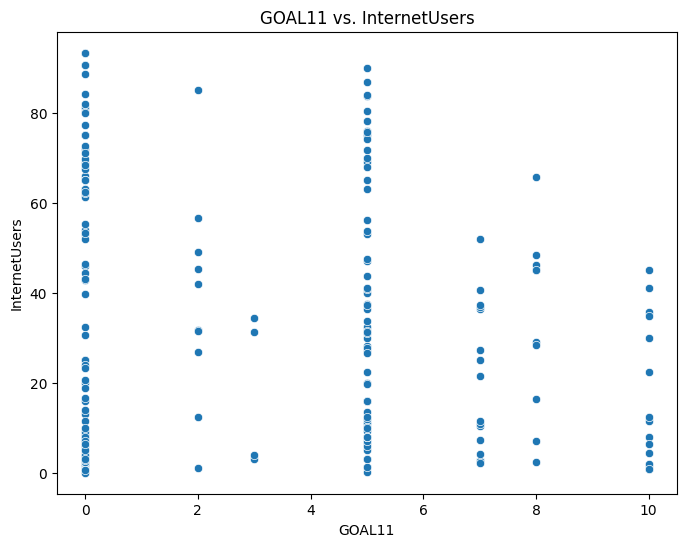

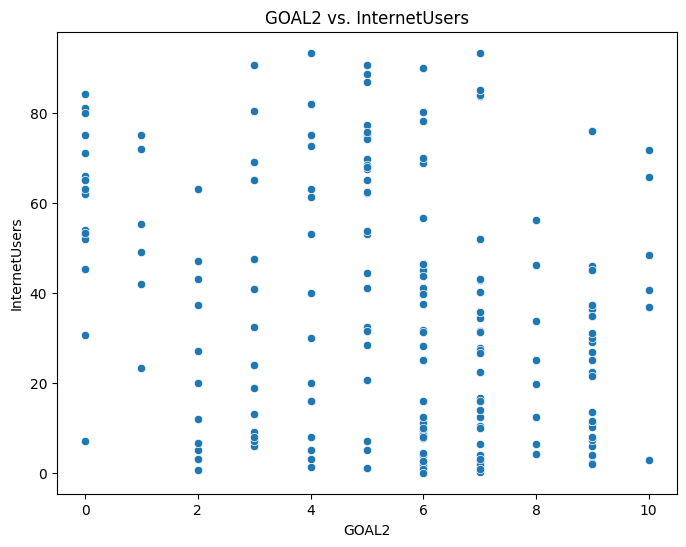

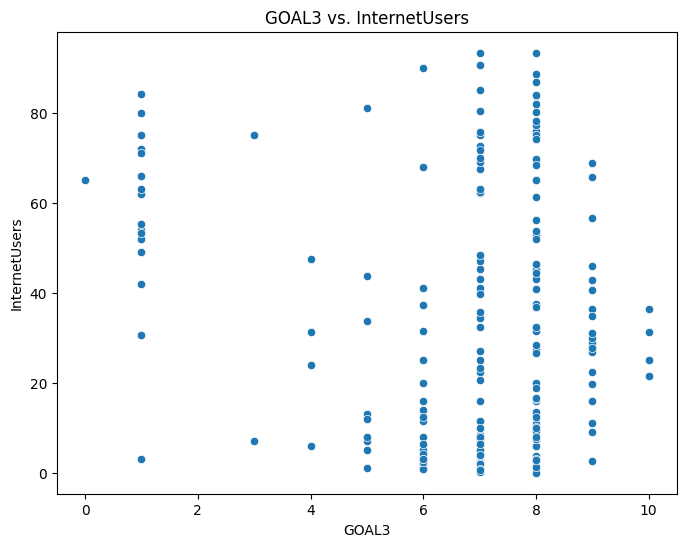

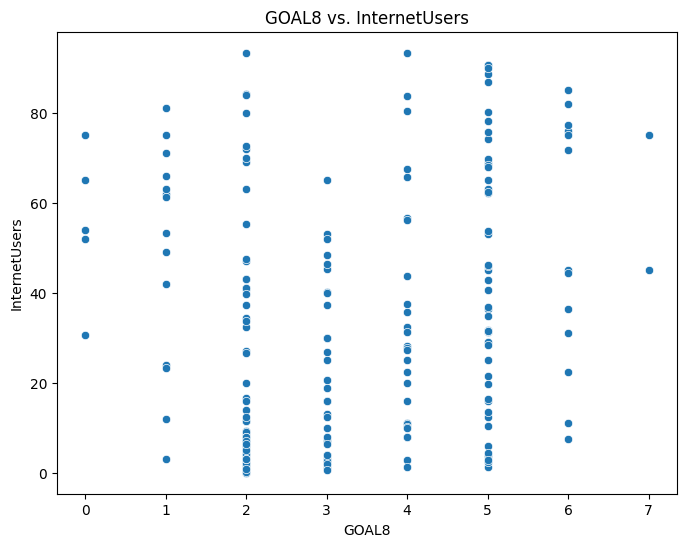

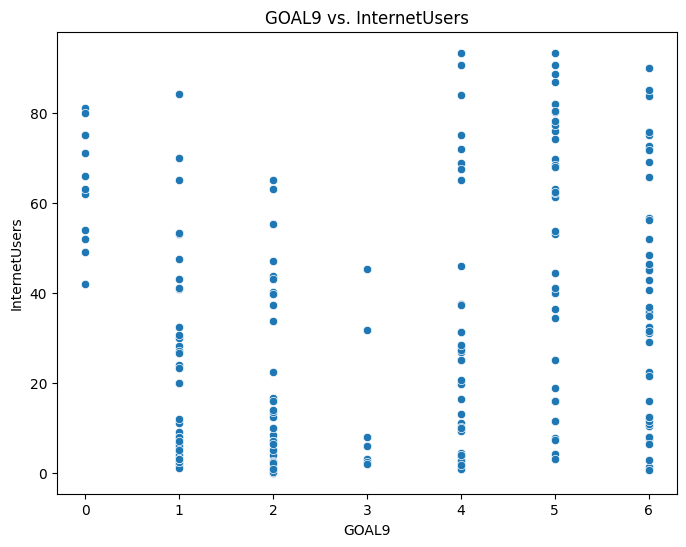

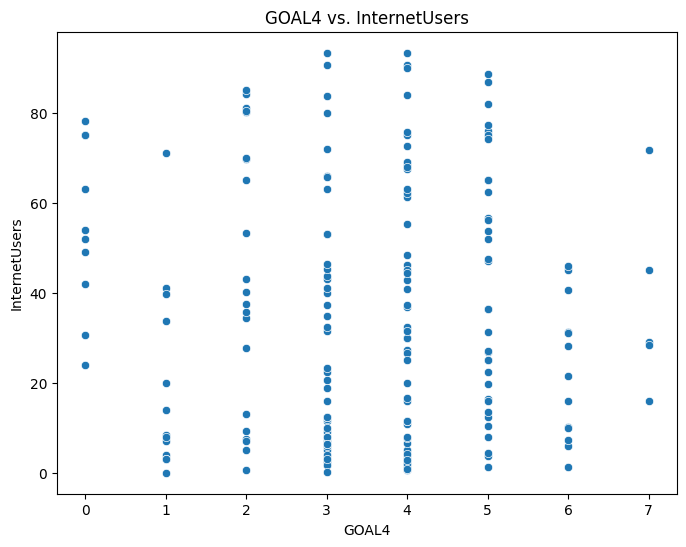

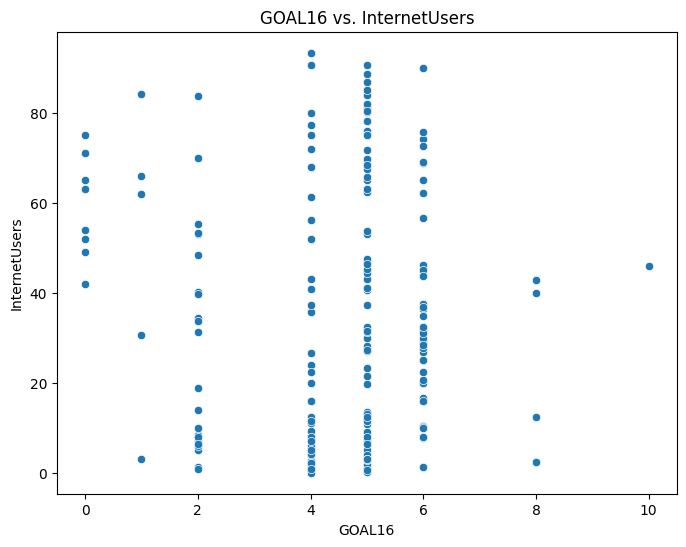

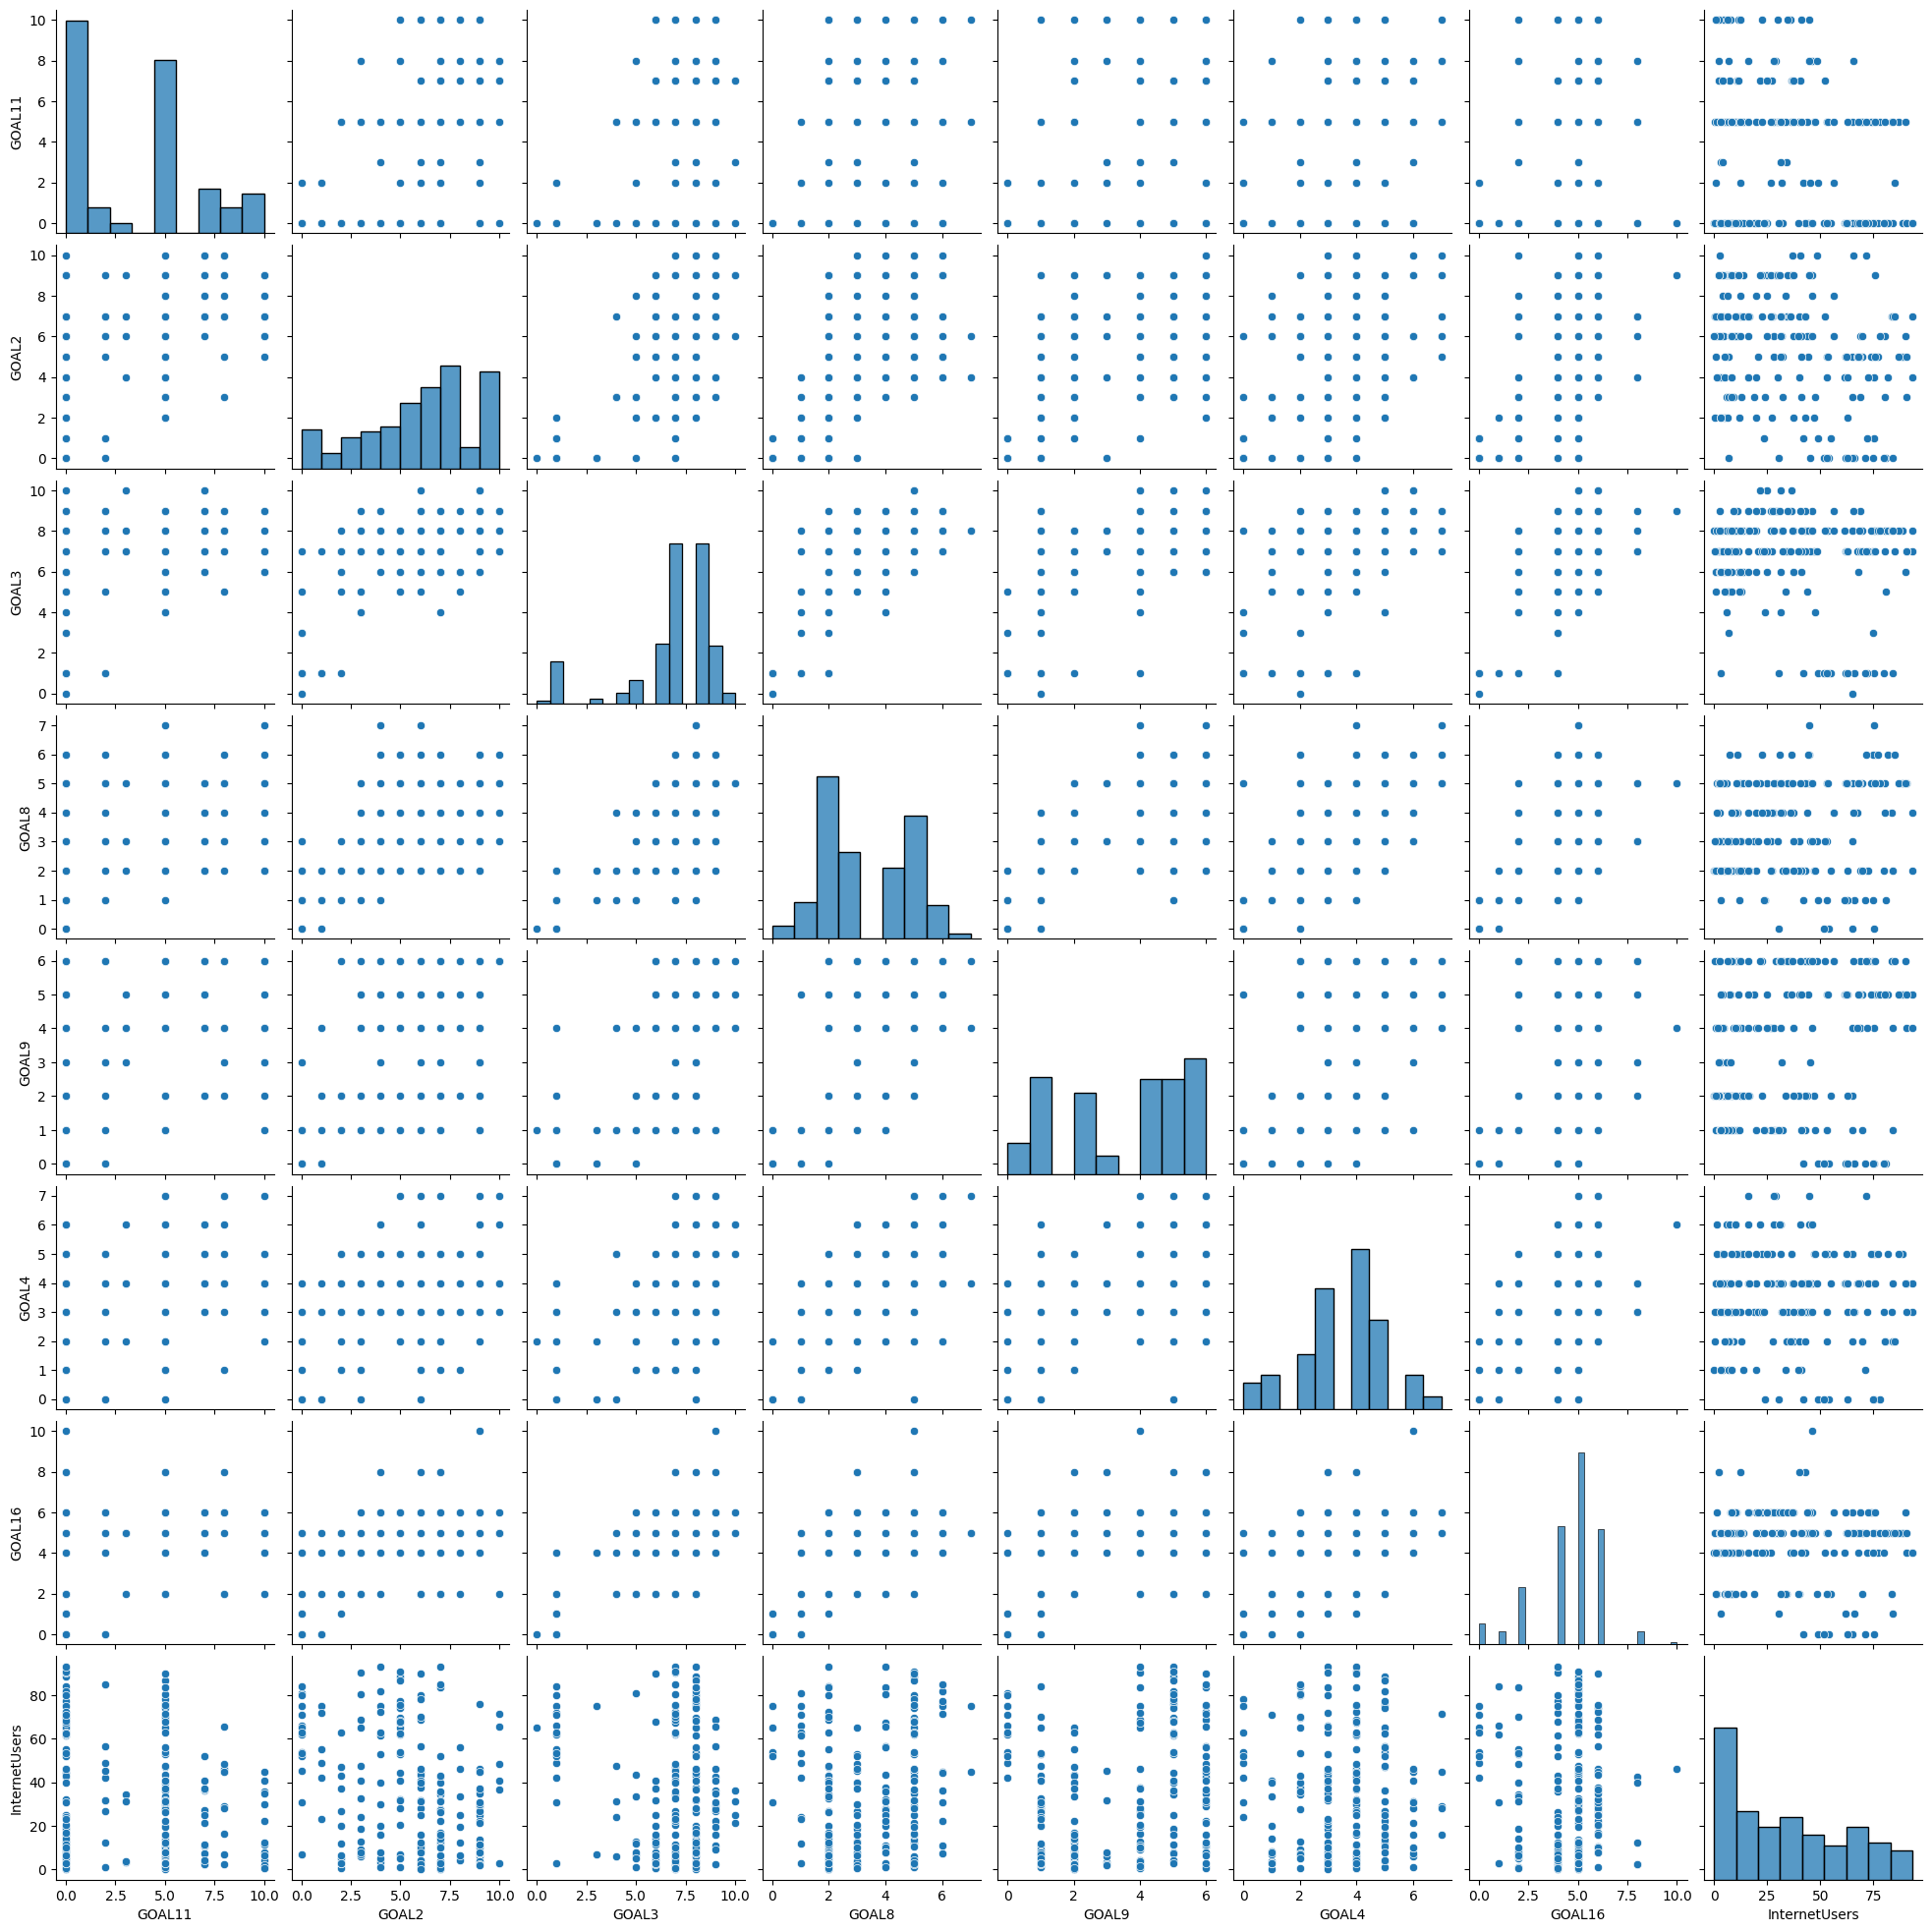

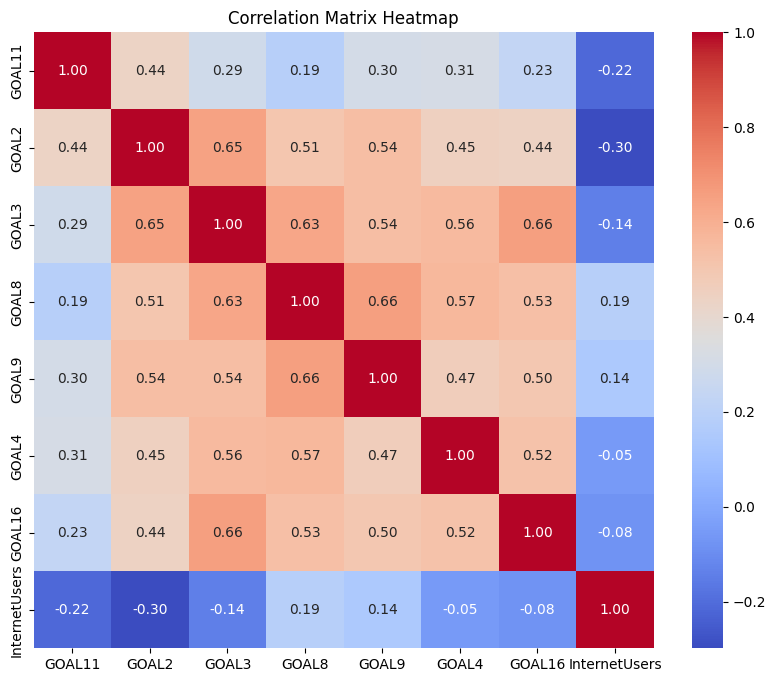

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# scatter plots por cada GOAL vs. InternetUsers
for col in goal_columns:
  plt.figure(figsize=(8, 6))
  sns.scatterplot(x=col, y='InternetUsers', data=country_df)
  plt.title(f'{col} vs. InternetUsers')
  plt.xlabel(col)
  plt.ylabel('InternetUsers')
  plt.show()

#pairplot
sns.pairplot(country_df, vars=goal_columns + ['InternetUsers'], kind='scatter')
plt.show()


#matrix heatmap
correlation_matrix = country_df[goal_columns + ['InternetUsers']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

x = country_df.drop('InternetUsers', axis=1)
y = country_df['InternetUsers']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

x_train

,GOAL11,GOAL2,GOAL3,GOAL8,GOAL9,GOAL4,GOAL16
90,5,5,8,5,5,5,5
152,0,7,7,2,2,2,4
170,5,8,5,2,2,1,2
77,0,7,6,2,1,3,4
112,7,9,7,2,2,4,4
...,...,...,...,...,...,...,...
148,0,0,1,1,1,2,2
137,0,4,7,2,6,4,6
156,10,5,6,2,5,3,5
15,2,6,8,5,3,4,6


In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=21)
rf_model.fit(x_train, y_train)

lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [ ]:
rf_predictions = rf_model.predict(x_test)
lr_predictions = lr_model.predict(x_test)

rf_mse = mean_squared_error(y_test, rf_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)

print("Random Forest MSE:", rf_mse)
print("Linear Regression MSE:", lr_mse)

Random Forest MSE: 484.8870752098598
Linear Regression MSE: 477.8016827160356


In [ ]:
print("/nSample Predictions:")
num_samples = 5
for i in range(num_samples):
    print(f"Random Forest Prediction: {rf_predictions[i]}, Actual: {y_test.iloc[i]}")
    print(f"Linear Regression Prediction: {lr_predictions[i]}, Actual: {y_test.iloc[i]}")
    print(f"Fila en el DataFrame original: {y_test.index[i]}") # Nueva línea
    print()

/nSample Predictions:
Random Forest Prediction: 49.76548998288782, Actual: 47
Linear Regression Prediction: 30.60695550602752, Actual: 47
Fila en el DataFrame original: 5

Random Forest Prediction: 31.152700000000024, Actual: 56.55
Linear Regression Prediction: 37.87692886028952, Actual: 56.55
Fila en el DataFrame original: 44

Random Forest Prediction: 38.09280000000005, Actual: 16.7
Linear Regression Prediction: 6.883828796662257, Actual: 16.7
Fila en el DataFrame original: 171

Random Forest Prediction: 14.236000000000008, Actual: 0.25
Linear Regression Prediction: 10.446899039558922, Actual: 0.25
Fila en el DataFrame original: 128

Random Forest Prediction: 13.2446, Actual: 12.35
Linear Regression Prediction: 20.9612617939176, Actual: 12.35
Fila en el DataFrame original: 199



In [ ]:
# Obtener los índices de las filas usadas en los ejemplos
sample_indices = y_test.index[:num_samples]

# Crear un nuevo DataFrame con las filas usadas en los ejemplos
sample_prediction_df = country_df.loc[sample_indices, :]

# Mostrar el nuevo DataFrame
print(sample_prediction_df)

     GOAL11  GOAL2  GOAL3  GOAL8  GOAL9  GOAL4  GOAL16 InternetUsers
5         5      2      7      2      2      5       5            47
44        2      6      9      4      6      5       6         56.55
171       0      7      8      2      2      4       6          16.7
128       5      7      7      2      2      3       5          0.25
199      10      8      6      2      6      3       5         12.35


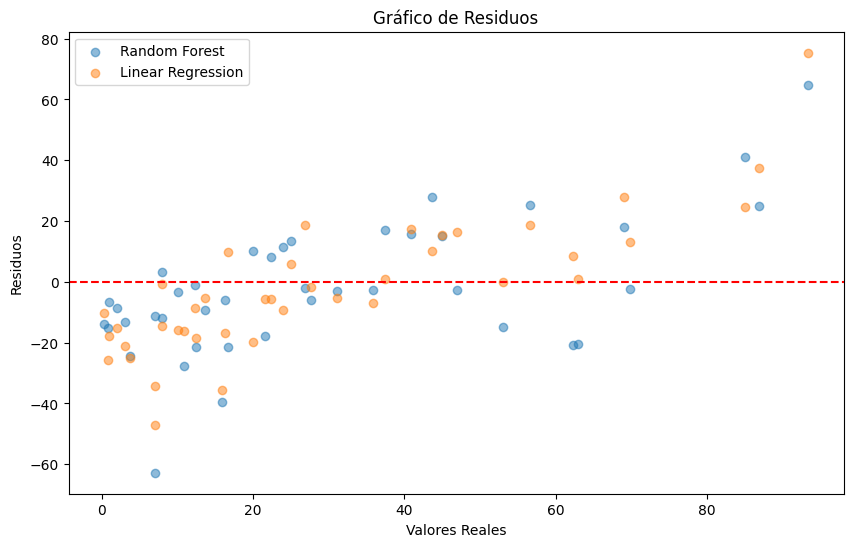

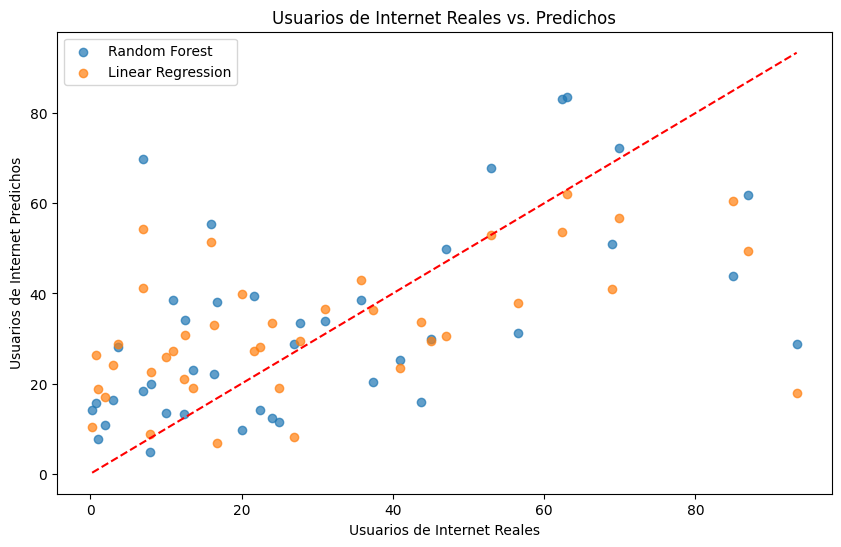

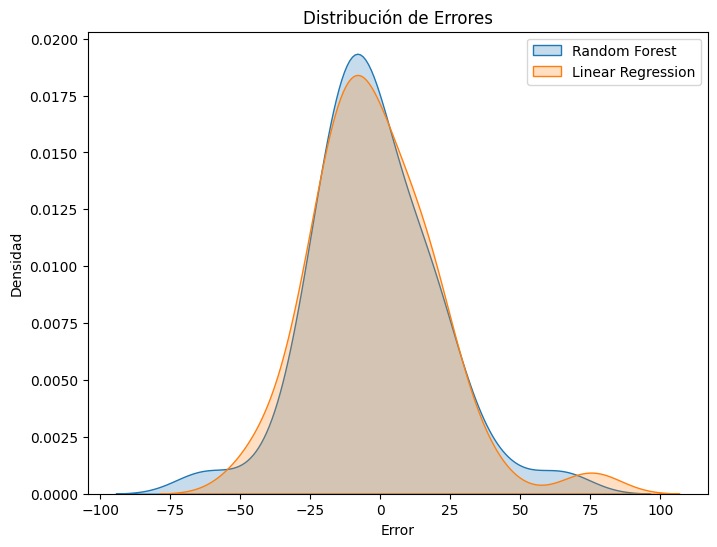

In [ ]:
# prompt: En base a la predicción creada en el código, qué graficos puedo usar que ilustre qué modelo es mas cercano a la realidad

import matplotlib.pyplot as plt

# Create a DataFrame for easier plotting
results_df = pd.DataFrame({'Actual': y_test, 'Random Forest': rf_predictions, 'Linear Regression': lr_predictions})

# 1. Residual Plots:
plt.figure(figsize=(10, 6))
plt.scatter(results_df['Actual'], results_df['Actual'] - results_df['Random Forest'], label='Random Forest', alpha=0.5)
plt.scatter(results_df['Actual'], results_df['Actual'] - results_df['Linear Regression'], label='Linear Regression', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  # Línea horizontal en cero
plt.xlabel('Valores Reales')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')
plt.legend()
plt.show()


# 2. Predicted vs. Actual Values:
plt.figure(figsize=(10, 6))
plt.scatter(results_df['Actual'], results_df['Random Forest'], label='Random Forest', alpha=0.7)
plt.scatter(results_df['Actual'], results_df['Linear Regression'], label='Linear Regression', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Línea de predicción perfecta
plt.xlabel("Usuarios de Internet Reales")
plt.ylabel("Usuarios de Internet Predichos")
plt.title("Usuarios de Internet Reales vs. Predichos")
plt.legend()
plt.show()


#3. Distribution of errors

plt.figure(figsize=(8,6))
sns.kdeplot(results_df['Actual'] - results_df['Random Forest'], label = 'Random Forest', fill=True)
sns.kdeplot(results_df['Actual'] - results_df['Linear Regression'], label = 'Linear Regression', fill=True)
plt.xlabel('Error')
plt.ylabel('Densidad')
plt.title('Distribución de Errores')
plt.legend()
plt.show()

